У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

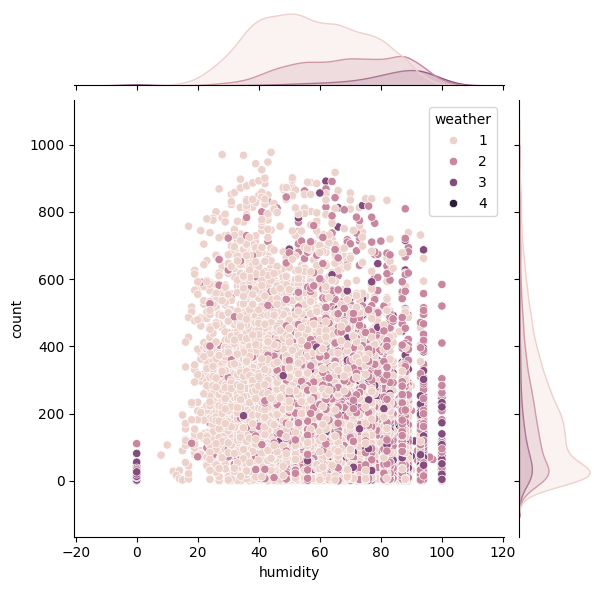

In [5]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather")
plt.show();

**Спостереження з графіка розсіювання:**
1.   Найбільшу кількість користувачів сервіс має навесні (перший сезон), також багато користувачів влітку (2 сезон), більшість з цих користувачів користуються сервісом за вологості від 18 до 90.
2.   Восени (третій сезон) є невелика кількість користувачів, які користуються сервісом за нетипових показників вологості (0, а також 100).
3. Цікаво, що майже за усіх показників вологості (від 18 до 100) кількість користувачів все одно зростає.
4. На графіку відсутні або практично відсутні користувачі, які користуються сервісом взимку.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [6]:
spring_summer = pd.DataFrame(df.query('season == 1 | season == 2'))

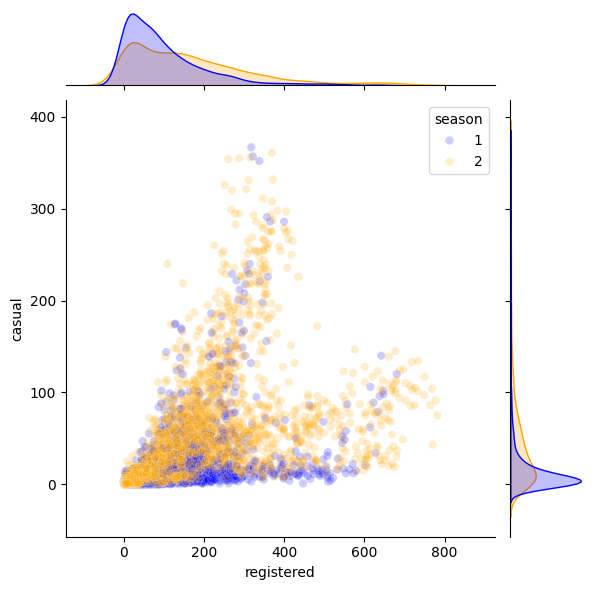

In [7]:
sns.jointplot(data=spring_summer, x='registered', y='casual', hue='season', alpha=.2, palette=['blue', 'orange'])
plt.show();

**З розташування точок на графіку ми можемо зробити наступні висновки:**

1.   Лінія фіолетового кольору у нижній частині графіку демонструє нам, що навесні у певні години кількість зареєстрованих користувачів стрімко зростає, водночас кількість звичайних користувачів (без реєстрацій) має нульове значення.
2.   Друга лінія на графіку показує нам, що у літньому сезоні в певні години кількість зареєстрованих користувачів теж переважає, проте тут кількість звичайних користувачів, у порівнянні з попередніми результатами, вже теж зростає до 150.
3. Третя лінія вказує на те, що у сезоні 1 (навесні) у певні години є значна тенденція до приблизно однакового розподілу зареєстрованих та звичайних користувачів. Далі нам було б корисно зрозуміти чому так відбувається.



3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


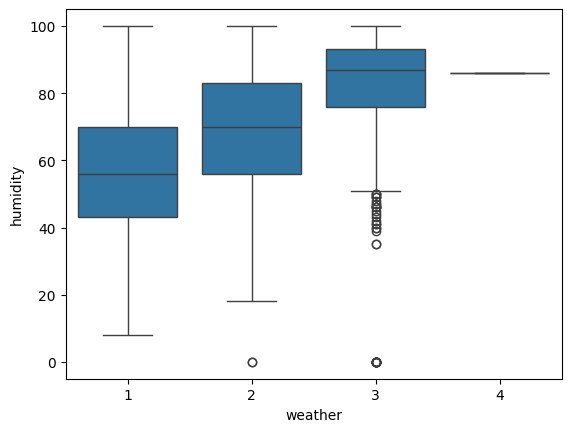

In [8]:
sns.boxplot(data=df, x='weather', y='humidity')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [9]:
df.filtered =  df[['casual', 'registered', 'count', 'workingday']]

<ipython-input-9-9ab688b1db28>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.filtered =  df[['casual', 'registered', 'count', 'workingday']]


<Figure size 500x500 with 0 Axes>

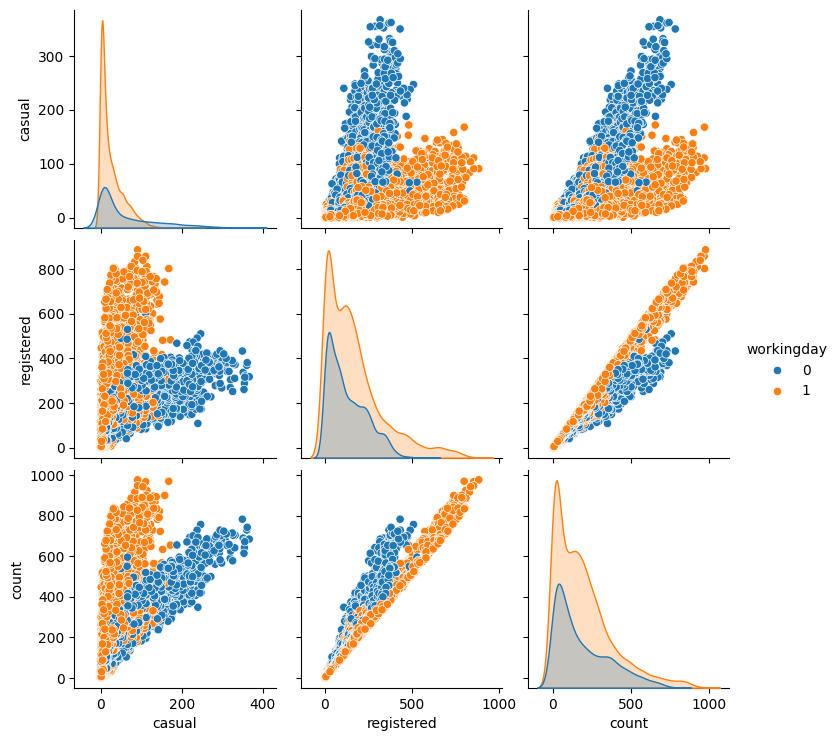

In [10]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df.filtered , hue='workingday');
plt.show();

*   У робочі дні кількість зареєстрованих користувачів стрімко зростає, на вихідні ця група теж демонструє зростання, проте не таке стрімке.
*   Кількість звичайних користувачів у порівнянні з усіма користувачами у робочі дні практично завжди має однакові значення, натомість у вихідні або святкові дні ця група показує значне зростання.

**Враховуючи ці спостереження, варто було б запропонувати якісь знижки або бонуси за реєстрацію користувачів саме у вихідні дні.**


5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [32]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [33]:
df['date'] = df.datetime.dt.date

In [34]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()

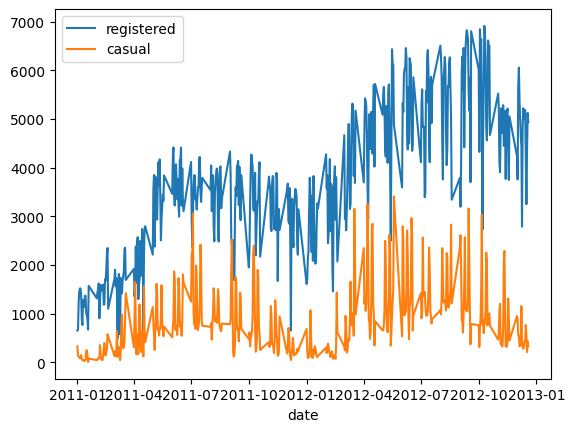

In [35]:
df_viz.plot();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
